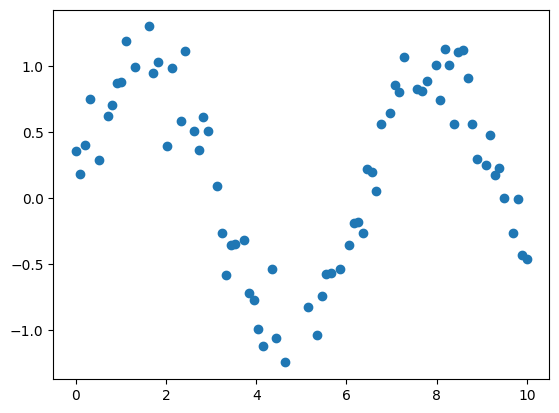

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = np.sin(X) + np.random.normal(0, 0.2, size=(m, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X_train, y_train)
plt.show()

In [34]:
class MyModel:

    def __init__(self):
        self.hidden_n = 10
        self.lr = 0.01
        self.w1 = np.random.randn(self.hidden_n, 2)
        self.w2 = np.random.randn(1, self.hidden_n)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    def tanh(self, z):
        return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    
    def tanh_derivative(self, z):
        return 1 - self.tanh(z)**2
    
    def forward(self, netin0):
        self.netin0 = netin0
        self.out0 = self.netin0
        self.netin1 = np.dot(self.w1, self.out0)
        self.out1 = self.tanh(self.netin1)
        self.netin2 = np.dot(self.w2, self.out1)
        self.out2 = self.tanh(self.netin2)
        return self.out2
    
    def backward(self, out2, target):
        self.target = target
        self.out2 = out2

        self.dev2 = self.out2 - self.target
        self.del2 = self.tanh_derivative(self.netin2) * self.dev2
        self.grad2 = np.dot(self.del2, self.out1.T)

        self.dev1 = np.dot(self.w2.T, self.del2)
        self.del1 = self.tanh_derivative(self.netin1) * self.dev1
        self.grad1 = np.dot(self.del1, self.out0.T)

        self.w1 -= self.lr * self.grad1
        self.w2 -= self.lr * self.grad2

In [35]:
# normalize X_train and y_train
X_train = (X_train - X_train.mean()) / X_train.std()
y_train = (y_train - y_train.mean()) / y_train.std()


def mse(y, y_pred):
    return 1 / 2 * (y - y_pred) ** 2


model = MyModel()

for epoch in range(20000):
    total_error = []
    for train, target in zip(X_train, y_train):
        train = np.append(train, 1)
        out2 = model.forward(train.reshape(2, 1))
        model.backward(out2, target)
        err = mse(target, out2)
        total_error.append(err)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Error {np.mean(total_error)}")
        print(model.w1, model.w2)

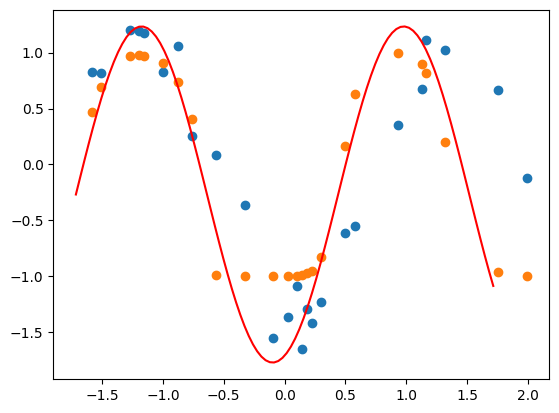

In [36]:
# evaluate model on test set
X_test = (X_test - X_test.mean()) / X_test.std()
y_test = (y_test - y_test.mean()) / y_test.std()
X_true_sin = np.linspace(0, 10, 100)
y_true_sin = np.sin(X_true_sin)
X_true_sin = (X_true_sin - X_true_sin.mean()) / X_true_sin.std()
y_true_sin = (y_true_sin - y_true_sin.mean()) / y_true_sin.std()


y_pred = []
for test in X_test:
    test = np.append(test, 1)
    out = model.forward(test.reshape(2, 1))
    y_pred.append(out)

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.plot(X_true_sin, y_true_sin, color='red')
plt.show()